In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 8.1 차원의 저주

In [ ]:
#고차원일수록 데이터간 평균 거리가 멀다.
# 따라서 새로운 샘플에 대한 예측이 불안할수밖에 없다.
#이를 해결하기 위해서는 공간에 밀도가 높아질떄까지 훈련 샘플을 모아야한다.
#하지만 모아야 하는 샘플 숫자도 차원이 커짐에 따라 기하급수적으로 커진다.

# 8.2 차원 축소를 위한 접근법

## 8.2.1 투영

In [3]:
#대부분의 고차원공간의 데이터들은 고차원의 저차원 부분공간에 분포함. ( 서로 연관된 특성이 많기때문)

#수직으로 투영

#하지만 뒤틀린 경우 뭉개지는 경우가있음

## 8.2.2 매니폴드 학습

In [4]:
#d차원 매니폴드는 국부적으로 d차원 초평면으로 보이는 n차원 공간의 일부 (d<n)

# 8.3 PCA

In [6]:
#가장 가까운 초평면을 정의한 후 투영시킴

## 8.3.1 분산보존

In [5]:
#각 축에 투영했을때 분산이 가장 커야 정보손실이 적음
#원본데이터와 투영된것 사이의 평균제곱오차 최소화

## 8.3.2 주성분

In [7]:
#1.훈련세트의 분산을 최대로 보존하는 축 찾음
#2. 첫번쨰 축에 직교하면서 남은 분산 최소화하는 축 찾음
#반복

## 8.3.3 d차원으로 투영하기

In [ ]:
#d개의 주성분으로 정의한 초평면에 투영시킴
#원본데이터와 비슷하게 생김

## 8.3.4 사이킷런 이용하기

In [11]:
#3차원 데이터셋
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

## 8.3.5 설명된 분산의 비율

In [14]:
pca.explained_variance_ratio_

#첫번쨰 주성분을따라 84프로가 놓여있음
#두번쨰 주성분을따라 14프로가 놓여있음
#남은 1~2프로만이 3번쨰 주성분이 있음

array([0.84248607, 0.14631839])

## 8.3.6 적절한 차원 수 선택하기

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.target = mnist.target.astype(np.uint8)

In [17]:
from sklearn.model_selection import train_test_split

X=mnist["data"]
y=mnist["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [18]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum.shape)
d=np.argmax(cumsum>=0.95) +1

(784,)


In [24]:
d
#154번쨰 특성(픽셀부터 설명가능한 분산 비율이 95프로 넘음)

154

#### n_components = 0.95도 가능

In [25]:
pca = PCA(n_components=0.95) #보존하려는 분산의 비율
#위에서 구한 d = 154를 n_components=154로 해도됨
X_reduced  = pca.fit_transform(X_train)

In [30]:
#0.95로 했을때도 직접 계산한것과 같이 154나옴
pca.n_components_

154

In [32]:
np.sum(pca.explained_variance_ratio_)
#설명된분산 95퍼센트 확인

0.9503684424557421

In [26]:
X_reduced

array([[-563.82559445,  376.21158523,  547.80926275, ...,   27.55021763,
         -28.99365655,   22.0882605 ],
       [-247.60677317,  594.11581251, -761.17658851, ...,   21.21515701,
         -12.91702701,  -71.9678063 ],
       [ -76.10689476, -718.88626736, -621.34715832, ...,  -15.63703969,
          27.32682087,  -46.49334898],
       ...,
       [ 446.89768572,  200.53844512, -326.08785445, ...,  -16.17022423,
          28.40929801,   53.86153314],
       [ 794.82898692, -164.97878958,   48.41468923, ...,  -51.41226115,
           3.66933099,    7.84388081],
       [-903.11423891, -456.07654002, -139.58512285, ...,    3.89819809,
          58.74804585,    2.75381847]])

#### 분산을 차원에 대한 함수로 나타내어 그려볼수도 있음.

그림 저장 explained_variance_plot


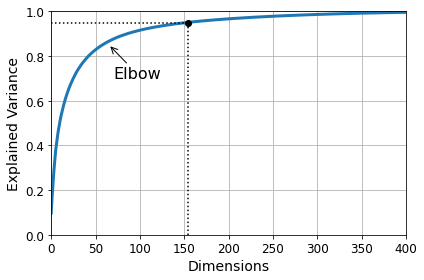

In [29]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0,400,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d,d],[0,0.95], "k:")
plt.plot([0,d],[0.95,0.95],"k:")
plt.plot(d,0.95,"ko")

plt.annotate("Elbow", xy=(65,0.85), xytext = (70,0.7),
             arrowprops = dict(arrowstyle="->"),fontsize=16)


plt.grid(True)

save_fig("explained_variance_plot")

plt.show()



## 8.3.7 압축을 위한 PCA

In [33]:
#pca를 역으로 적용하여 784차원으로 돌릴수도 있음(mnist)
#95%니깐 5%의 분산을 잃어버려 원본을 얻을수는 없지만 비슷함.
#원본데이터와 재구성 데이터의 평균제곱거리를 "재구성오차"

#pca.inverse_transform()

In [34]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [47]:
def plot_digits(instances, images_per_row=5,**options):
    size= 28
    images_per_row = min(len(instances), images_per_row)
    images=[instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1 ) // images_per_row +1
    row_images=[]
    n_empty = n_rows*images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    
    for row in range(n_rows):
        rimages = images[row*images_per_row :(row+1) * images_per_row]
        
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap=mpl.cm.binary,**options)
    plt.axis("off")

(140, 140)
(140, 140)
그림 저장 mnist_compression_plot


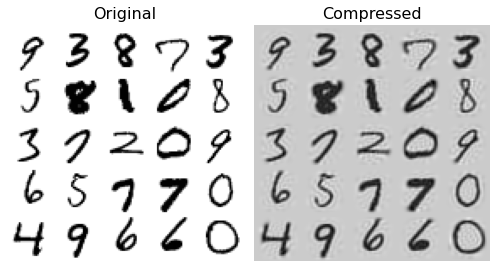

In [59]:
plt.figure(figsize=(7,4))
plt.subplot(121)
#52500 // 2100 =25
plot_digits(X_train[::2100])#증가폭
plt.title("Original",fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed",fontsize=16)
save_fig("mnist_compression_plot")

In [46]:
X_reduced_pca = X_reduced

## 8.3.8 랜덤 PCA

In [60]:
#확률적 알고리즘을 사용하여 처음 d개 주성분에 대한 근삿값을 빠르게 찾음
#svd_solver = "randomized"
rnd_pca = PCA(n_components =154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

## 8.3.9 점진적 pca

In [61]:
#svd는 전체훈련셋을 메모리에 올려야함. 데이터셋이 커지면 오래걸림
#점진적 pca는 훈련세트를 미니배치로 나눈 후 점진적pca (IPCA)에 하나씩 주입
#fit이 아닌 partial_fit() 사용

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
    print(".", end = "")
    inc_pca.partial_fit(X_batch)
    
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [62]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

(140, 140)
(140, 140)


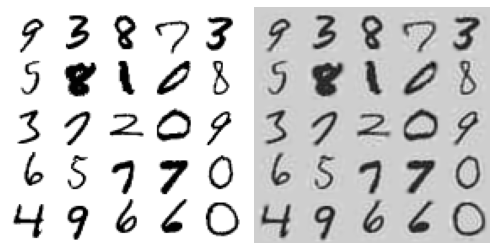

In [63]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

#비슷한 결과 나옴.

In [64]:
X_reduced_inc_pca = X_reduced

In [65]:
np.allclose(pca.mean_, inc_pca.mean_)
#평균이 같음

True

In [66]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)
#결과가 완전 같지는 않음.

False

#### 시간복잡도
주성분 개수
pca, inc_pca , rnd_pca

In [67]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 1.2 초
    IncrementalPCA: 30.1 초
    PCA: 0.8 초
n_components = 10
    PCA: 0.8 초
    IncrementalPCA: 31.4 초
    PCA: 0.8 초
n_components = 154
    PCA: 4.7 초
    IncrementalPCA: 52.6 초
    PCA: 4.8 초


#### pca vs rnd_pca 시간복잡도 - 데이터의 크기

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

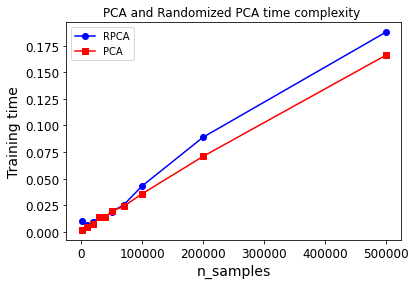

In [68]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

#### pca vs rnd_pca 시간복잡도 - 특성 수

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

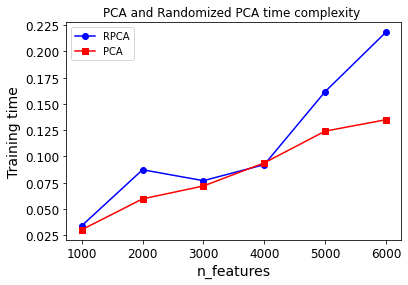

In [69]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

# 8.4 커널pca

In [71]:
from sklearn.datasets import make_swiss_roll

In [73]:
from sklearn.decomposition import KernelPCA

In [79]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

#### 1.지도학습의 성격이 있는 그리드서치 과정에서 커널과 파라미터를 찾는방법

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


clf = Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression(solver = "lbfgs"))
])

param_grid = [{
    "kpca__gamma":np.linspace(0.03,0.05,10),
    "kpca__kernel":["rbf","sigmoid"]
}]


In [81]:
grid_search = GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [83]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


#### 2.완전 비지도로 커널과 파라미터를 찾는과정

In [86]:
#커널로 무한공간으로 매핑한후 pca한 데이터포인터들.
#pca역전을 사용하여 재구성한 데이터 포인터들은 원본과 같은공간이 아님.
#따라서 가까운 원본공간 데이터를 찾아 만든 데이터가 "재구성한 원상"

#원본데이터(y)와 재구성한 원상(x)을 지도학습하면  비지도학습으로 (특성들만 가지고)
#KPCA의 최적커널과 파라미터를 찾을수 있다.

#fit_inverse_transform이 자동으로 수행해줌.

#rbf_pca의 inverse_transform은 fit_inverse_tranform이 True일때만 생성됨.
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.0433,
                   fit_inverse_transform=True)


X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)



In [88]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

#원본 <--> 재구성된 원상의 MSE

32.78630879576615

# 8.5 LLE

In [104]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)


In [105]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

그림 저장 lle_unrolling_plot


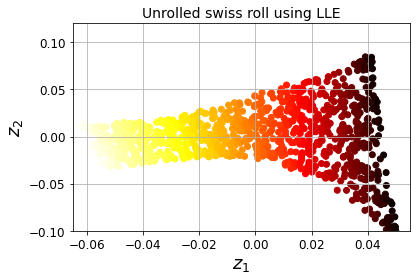

In [106]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

# 연습문제 9

#### 제: (3장에서 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다(처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다).

In [108]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]


X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

#### 문제: 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다.

In [109]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)


In [110]:
import time

t0= time.time()
rnd_clf.fit(X_train,y_train)
t1= time.time()

print("훈련시간 : {}".format(t1-t0))

훈련시간 : 29.916258096694946


In [112]:
from sklearn.metrics import accuracy_score

y_pred =rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9705

#### 문제: 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다.

In [113]:
from sklearn.decomposition import PCA

pca =PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

#### 문제: 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요?

In [114]:
t0 = time.time()
rnd_clf.fit(X_train_reduced,y_train)
t1=time.time()

In [115]:
print("훈련시간: {}".format(t1-t0))

훈련시간: 73.48779702186584


#### 이런! 훈련이 두 배 이상 느려졌습니다! 어떻게 이럴 수 있죠? 이 장에서 보았듯이 차원 축소는 언제나 훈련 시간을 줄여주지 못합니다. 데이터셋, 모델, 훈련 알고리즘에 따라 달라집니다.

####  새로운 랜덤 포레스트 분류기의 정밀도를 확인해 보죠.

In [117]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.9481

#### 차원 축소를 했을 때 유용한 정보를 일부 잃었기 때문에 성능이 조금 감소되는 것이 일반적입니다. 그렇지만 이 경우에는 성능 감소가 좀 심각한 것 같습니다. PCA가 별로 도움이 되지 않네요. 훈련 시간도 느려지고 성능도 감소했습니다. :(

#### 랜덤포래스트가 아닌 소프트맥스에서는 개선되는지 확인

In [118]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs",
                            random_state=42)
t0 = time.time()
log_clf.fit(X_train,y_train)
t1 = time.time()

print("훈련시간 :{}".format(t1-t0))

훈련시간 :6.896415948867798


/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9255

#### 소프트맥스 회귀는 랜덤 포레스트 분류기보다 이 데이터셋에서 훈련하는데 더 많은 시간이 걸리고 테스트 세트에서의 성능도 더 나쁩니다.

#### pca의 결과에는 어떤 영향을 주는지 확인

In [120]:
log_clf2 = LogisticRegression(multi_class="multinomial",solver="lbfgs",
                             random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced,y_train)
t1 = time.time()

print("훈련시간 : {}".format(t1-t0))

훈련시간 : 2.8289642333984375


/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 소프트맥스 에서는 pca가 속도를 빠르게 해줌

#### 정확도 확인

In [121]:
y_pred =log_clf2.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.9201

#### 여기서 알 수 있는 것: PCA는 속도를 아주 빠르게 만들어 주지만 항상 그런 것은 아니다!

# 연습문제 10

#### 문제: t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색깔로 나타낸 산점도를 그릴 수 있습니다.

앞서 로드한 MNIST 데이터셋을 사용합니다.
전체 60,000개의 이미지에 차원 축소를 하면 매우 오랜 시간이 걸리므로 10,000개의 이미지만 무작위로 선택하여 사용하겠습니다:

In [123]:
np.random.seed(42)

m=10000
idx =np.random.permutation(60000)[:m]

X=mnist['data'][idx]
y=mnist['target'][idx]

#### t-sne를 사용해 2d로 축소

In [125]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=42)

X_reduced = tsne.fit_transform(X)

#### 산점도

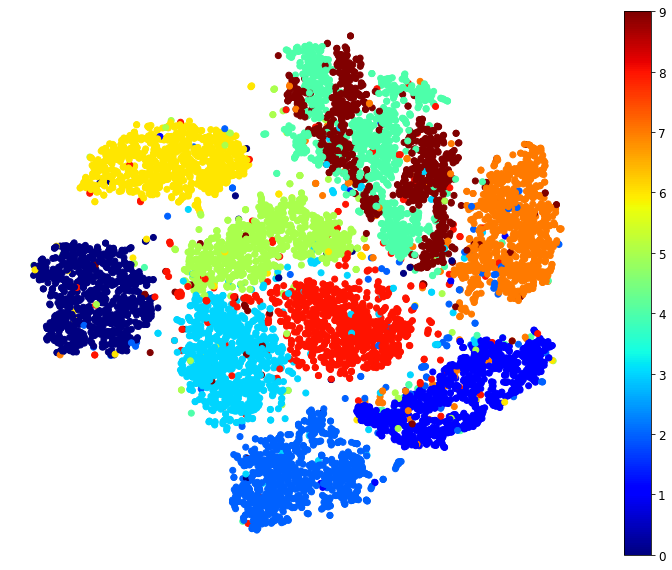

In [127]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1],c=y, cmap="jet")
plt.axis("off")
plt.colorbar()
plt.show()

#### 이 그래프는 어떤 숫자가 다른 것과 구분이 쉬운지 알려 줍니다(가령, 0, 6, 8이 잘 구분되어 있습니다). 그리고 어떤 숫자가 구분이 어려운지 알려 줍니다(가령, 4, 9, 5, 3 등입니다).

#### 많이 겹쳐진 것 같은 숫자 2, 3, 5에 집중해 보겠습니다.

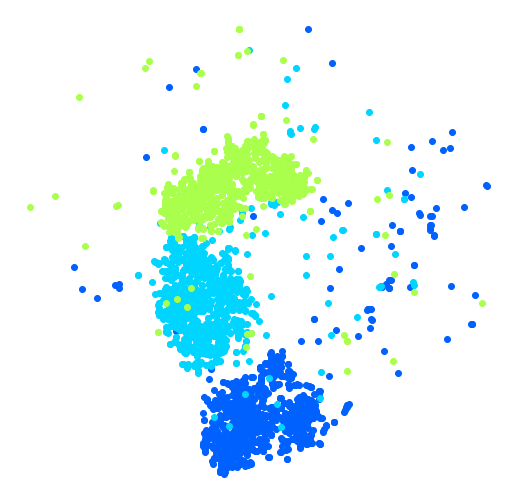

In [132]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2,3,5):
    plt.scatter(X_reduced[y == digit,0],X_reduced[y == digit,1],c =[cmap(digit/9)])

plt.axis("off")
plt.show()
    

#### 이 3개의 숫자에 t-SNE를 실행시켜 더 나은 이미지를 만들 수 있는지 보겠습니다:

In [133]:
idx =(y==2)|(y==3)|(y==5)

X_subset =X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components= 2 , random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

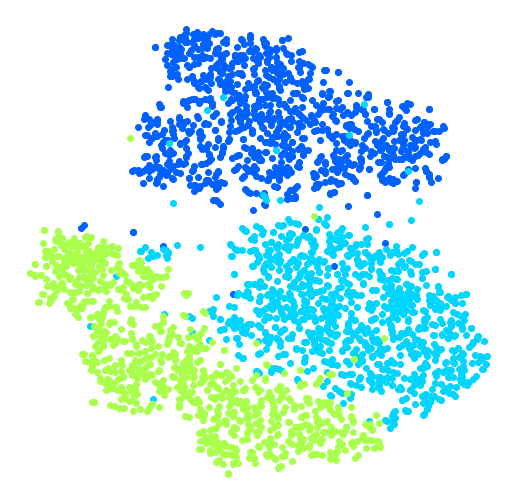

In [139]:
plt.figure(figsize=(9,9))
for digit in (2,3,5):
    plt.scatter(X_subset_reduced[y_subset==digit,0], X_subset_reduced[y_subset==digit,1], c=[cmap(digit/9)])
plt.axis("off")
plt.show()

#### 훨씬 좋네요. 이제 군집이 덜 겹쳐졌습니다

시각화 시에 각 군집에 숫자를 몇 개씩 나타내면 이런 이유를 훨씬 이해하는기 좋습니다. 

#### 문제: 또는 샘플의 위치에 각기 다른 색깔의 숫자를 나타낼 수도 있고, 숫자 이미지 자체의 크기를 줄여서 그릴 수도 있습니다(모든 숫자를 다 그리면 그래프가 너무 복잡해지므로 무작위로 선택한 샘플만 그리거나, 인접한 곳에 다른 샘플이 그려져 있지 않은 경우에만 그립니다). 잘 분리된 숫자의 군집을 시각화할 수 있을 것입니다.

#### (위에 있는 산점도와 비슷하게) 산점도와 색깔있는 숫자를 쓰기위해 plot_digits() 함수를 만듭니다. 이 숫자 사이의 거리가 최소가 되도록 합니다. 숫자 이미지가 있다면 대신 이를 사용합니다. 이 코드는 사이킷런의 훌륭한 데모(plot_lle_digits, 데이터셋은 다릅니다)를 참고했습니다.

In [140]:
np.unique([1,2,3,4,1,1,2,5,21,61])

array([ 1,  2,  3,  4,  5, 21, 61])

In [164]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X,y,min_distance=0.05,images=None, figsize=(13,10)):
    #입력 특성의 스케일을 0에서 1 사이로 만든다.
    X_normalized = MinMaxScaler().fit_transform(X)
    #그릴 숫자의 좌표 목록을 만든다.
    #반복문 아래에서 'if'문장을 쓰지 않기 위해 이미 그래프가 그려져 있다고 가정.
    neighbors = np.array([[10.,10.]])
    
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y) #y의 타겟들
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # 현재 그래프의 축을 가져옵니다.
    for index, image_coord in enumerate(X_normalized):
        
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        #neighbors가 계속 늘어나니깐 .min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

#### 시작해 보죠! 먼저 색깔이 입혀진 숫자를 써 보겠습니다:

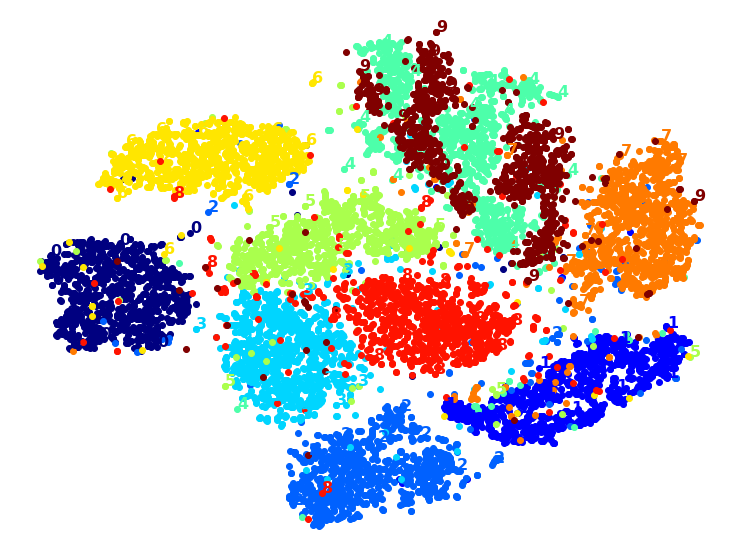

In [165]:
plot_digits(X_reduced, y)

#### 숫자 이미지 사용

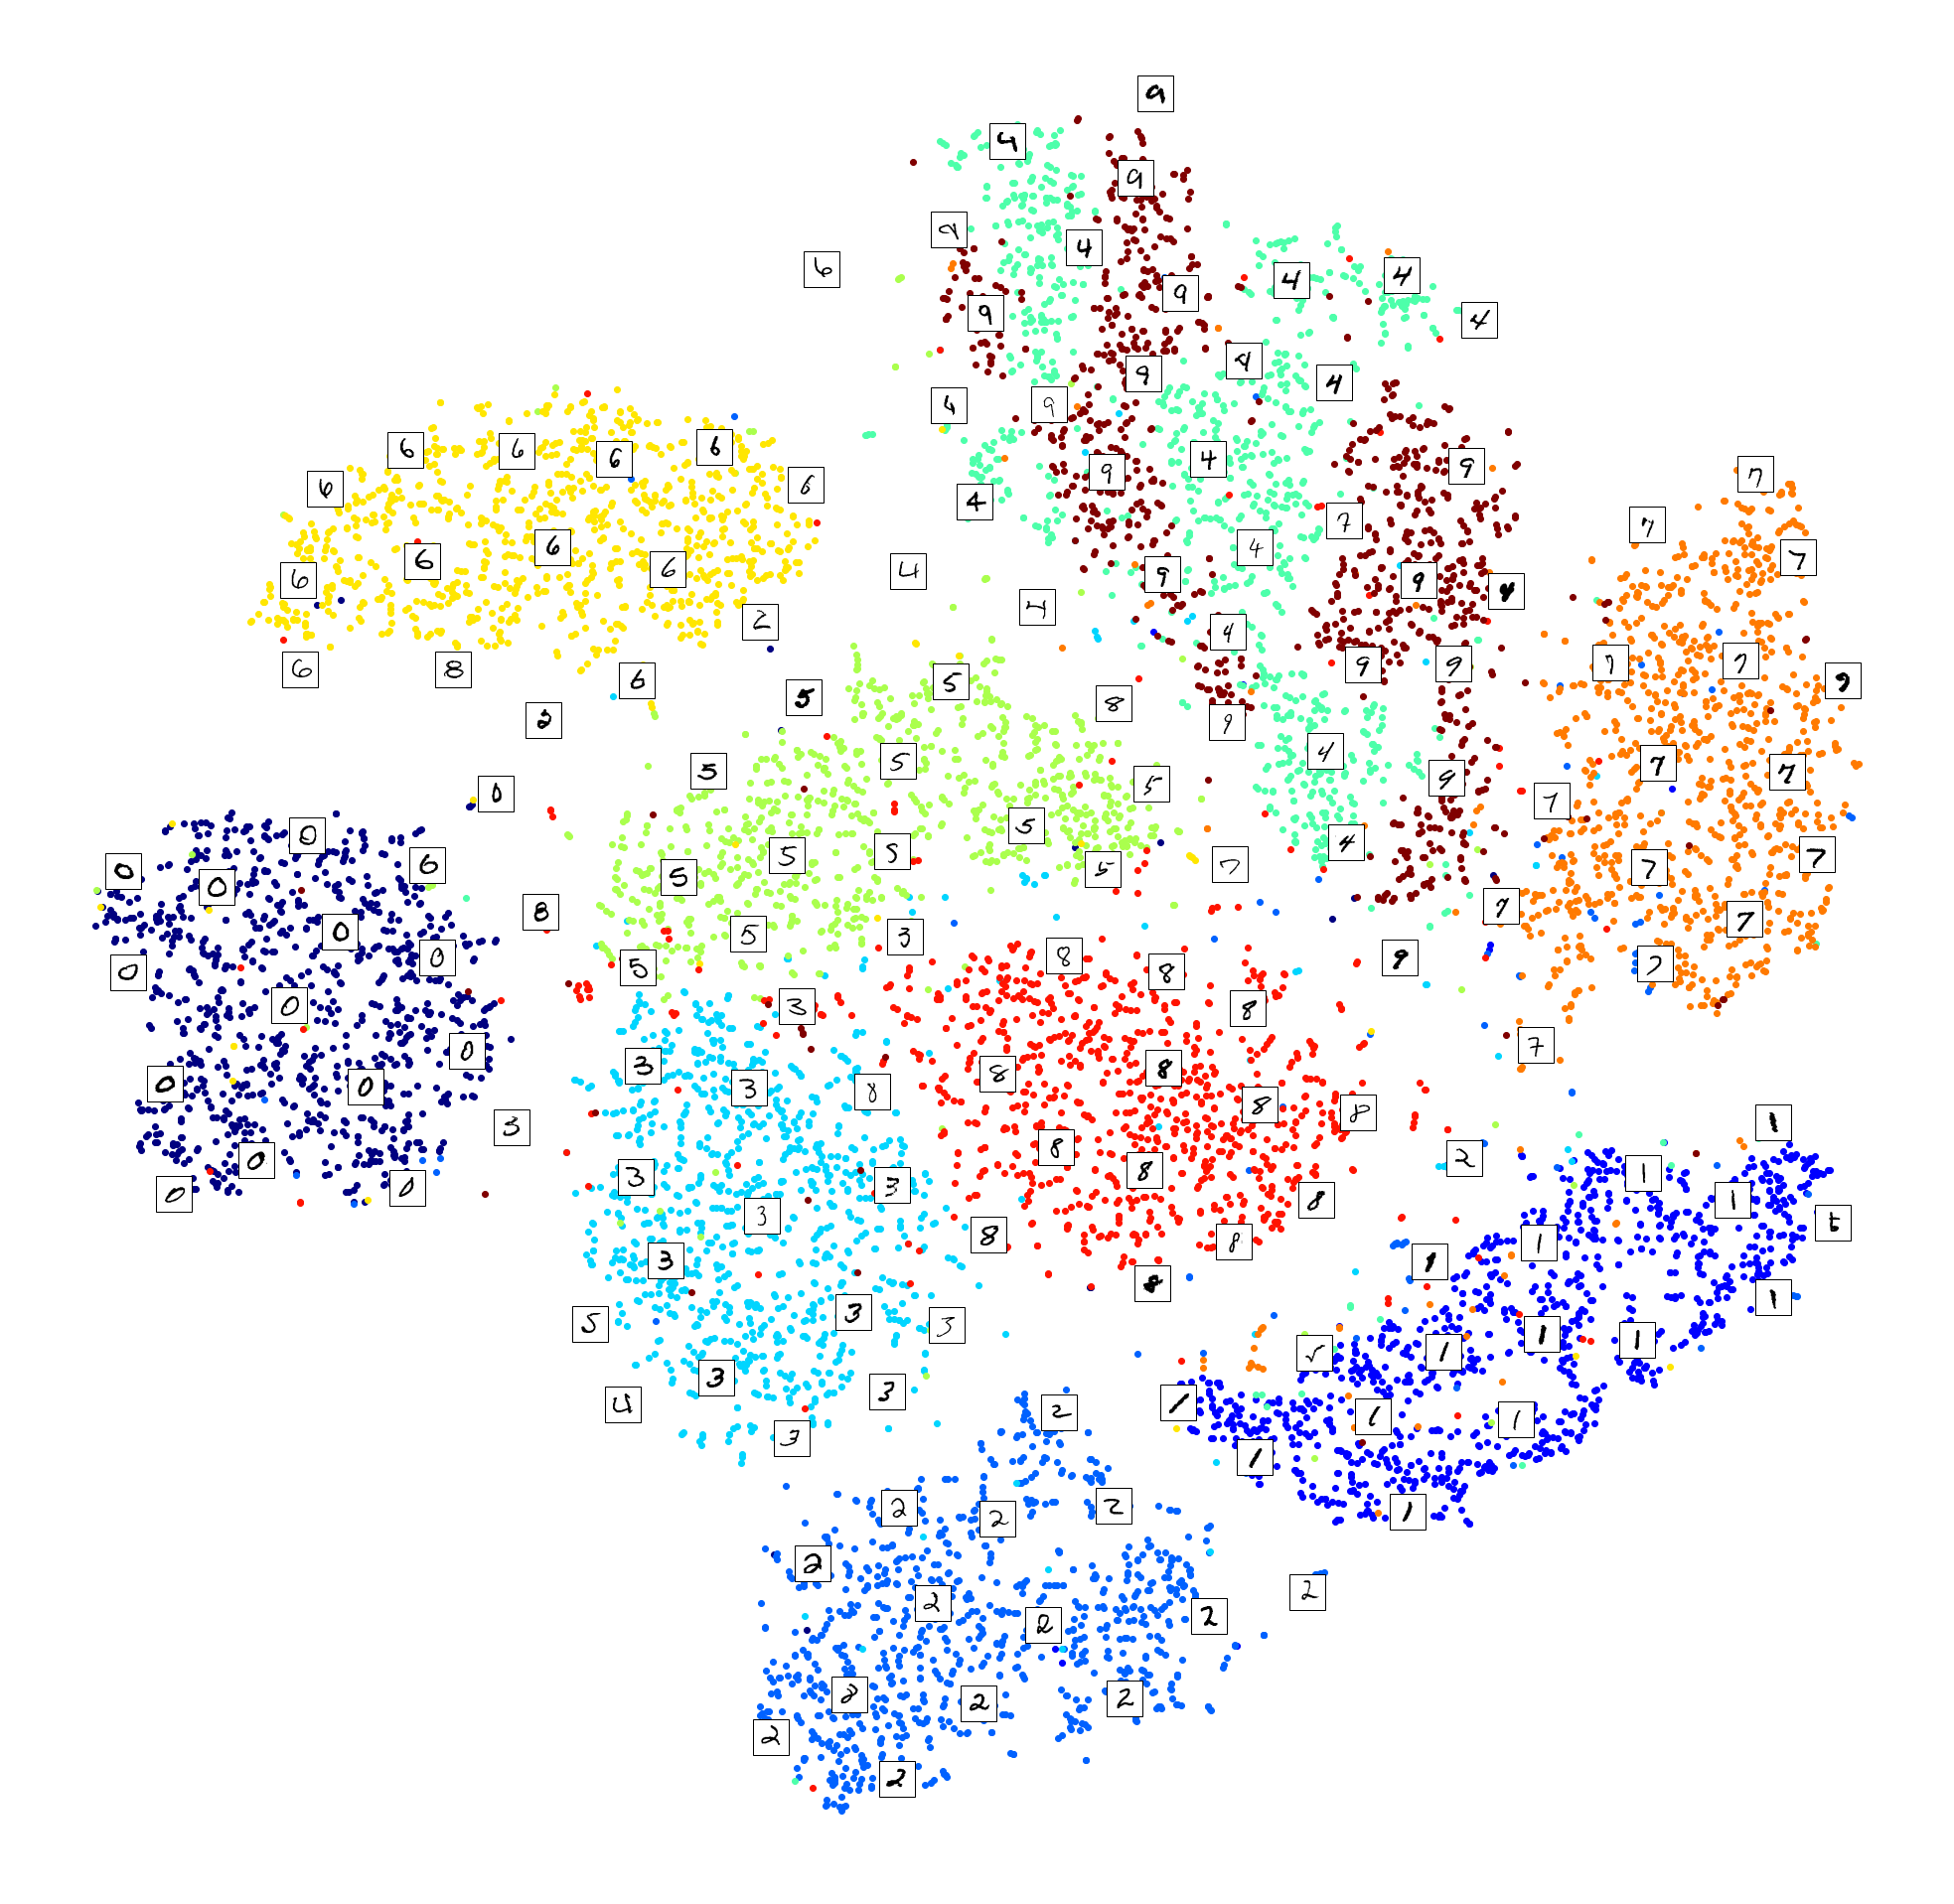

In [166]:
plot_digits(X_reduced,y,images=X,figsize=(35,35))

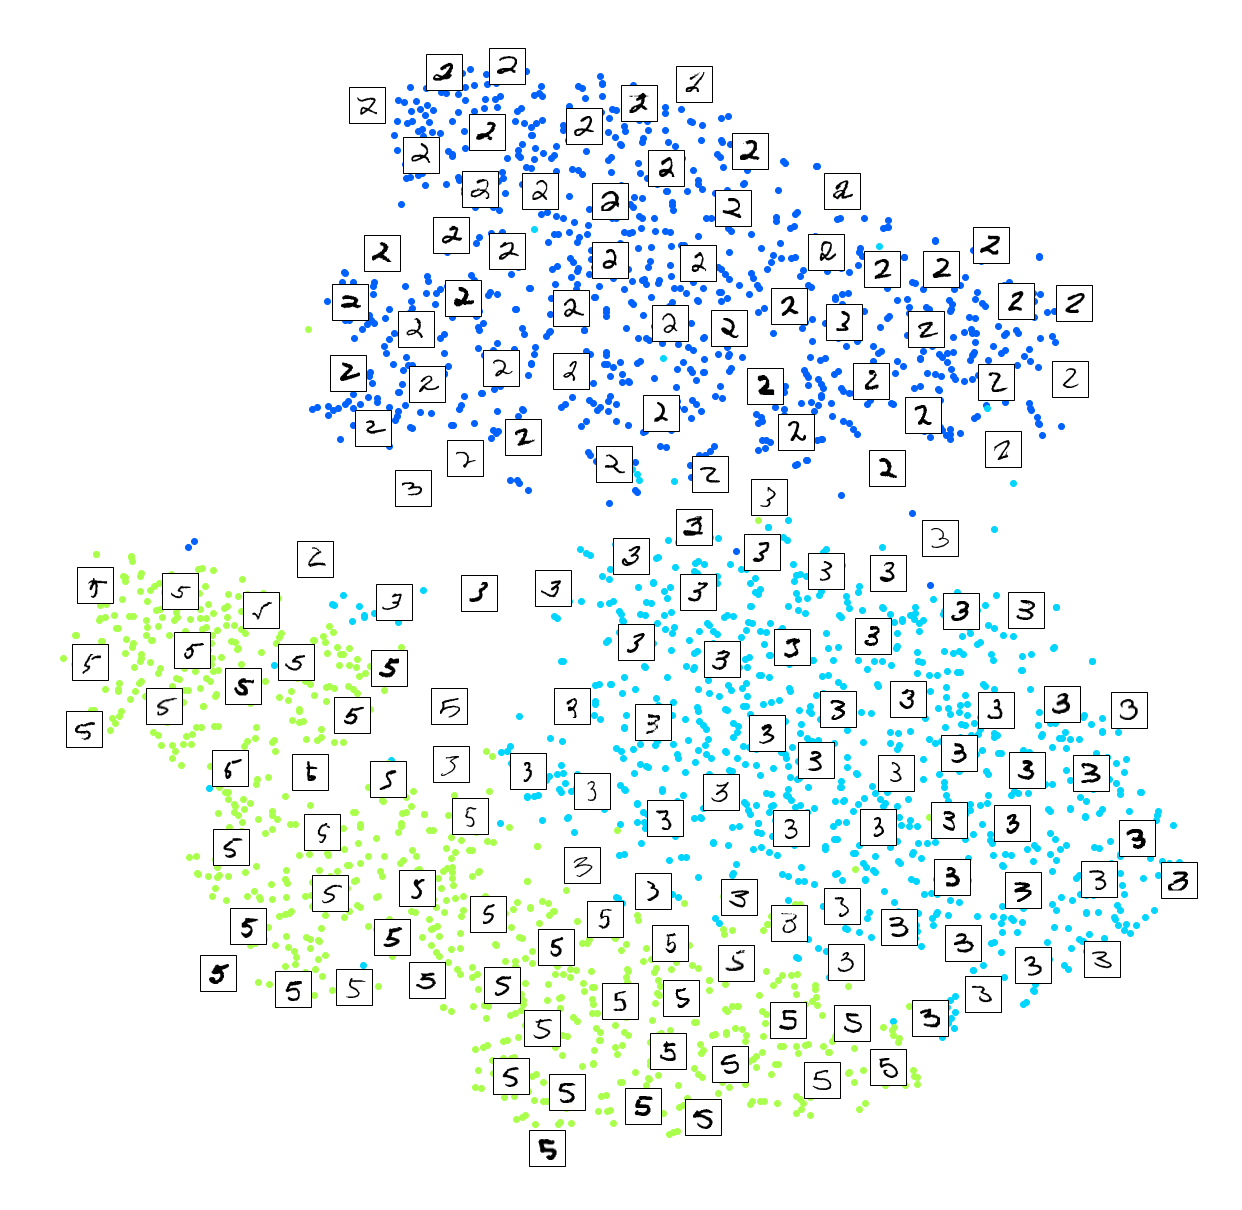

In [167]:
plot_digits(X_subset_reduced,y_subset,images = X_subset,figsize=(22,22))

#### 문제: PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보세요.

1.PCA

PCA tlrks: 0.4s


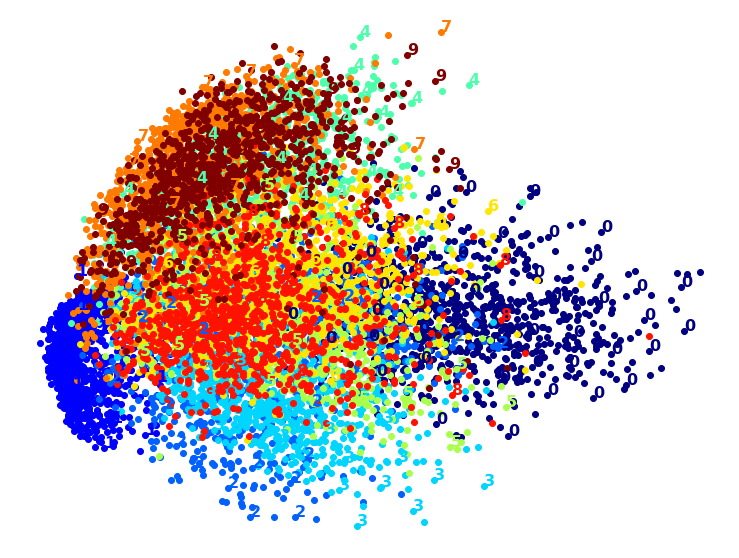

In [168]:
from sklearn.decomposition import PCA
import time

t0= time.time()
X_pca_reduced = PCA(n_components= 2 , random_state=42).fit_transform(X)
t1= time.time()
print("PCA tlrks: {:.1f}s".format(t1-t0))
plot_digits(X_pca_reduced,y)
plt.show()

#### 와우, PCA는 매우 빠르지면 몇개의 군집이 겹쳐져 보임


#### 2.LLE
lle는 주변 샘플들과의 선형관계를 유지하면서 차원축소

LLE시간 : 100.7s


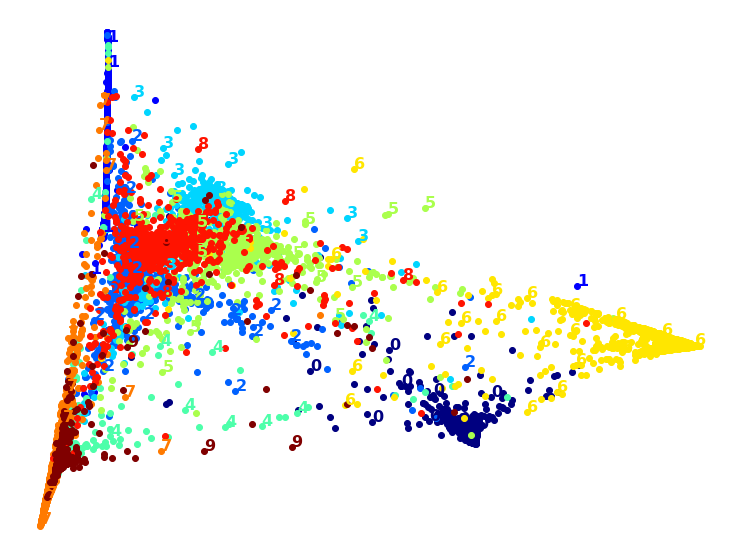

In [169]:
from sklearn.manifold import LocallyLinearEmbedding

t0=time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2,random_state=42).fit_transform(X)
t1=time.time()
print("LLE시간 : {:.1f}s".format(t1-t0))
plot_digits(X_lle_reduced,y)
plt.show()

#### 시간이 좀 걸리고 결과도 아주 좋지는 않습니다. 
3.PCA(95% var) + LLE 

PCA+LLE 시간 : 31.9s


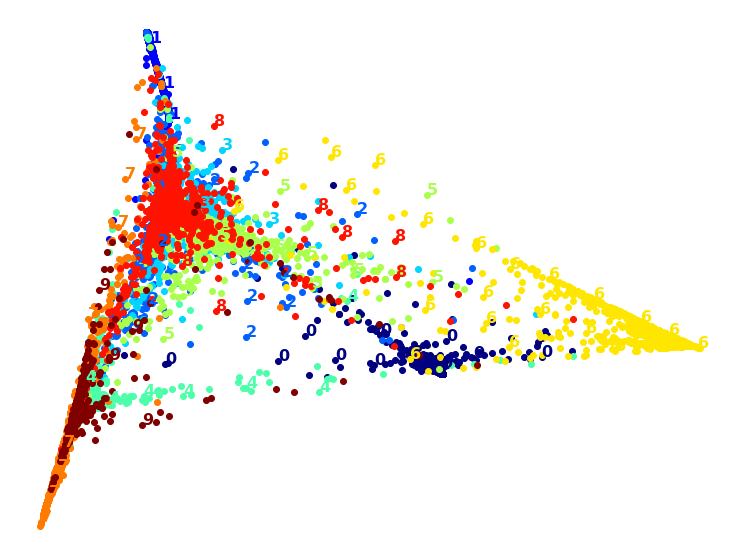

In [170]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca",PCA(n_components = 0.95, random_state=42)),
    
    ("lle",LocallyLinearEmbedding(n_components=2,random_state=42))
    
])

t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE 시간 : {:.1f}s".format(t1-t0))
plot_digits(X_pca_lle_reduced,y)
plt.show()

#### 결과는 비슷하지만 걸린 시간이 많이 줄었음.


#### 4.MDS
2000개의 샘플로 MDS
mds는 거리를 보존하면서 차원축소

MDS 시간 32.0s (2000개 샘플에서)


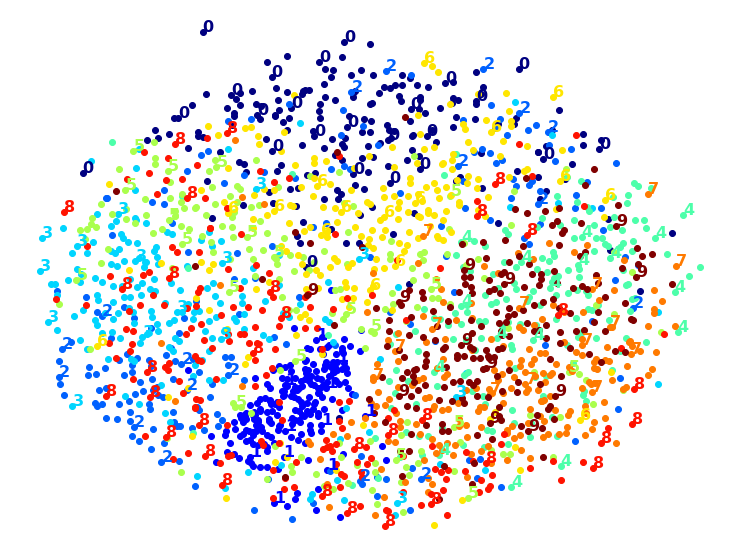

In [171]:
from sklearn.manifold import MDS


m=2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2,random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS 시간 {:.1f}s (2000개 샘플에서)".format(t1-t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

####  모든 군집이 너무 중복되어 있습니다. 

#### 5.pca+mds

MDS+PCA 시간 34.4s (2000개 샘플)


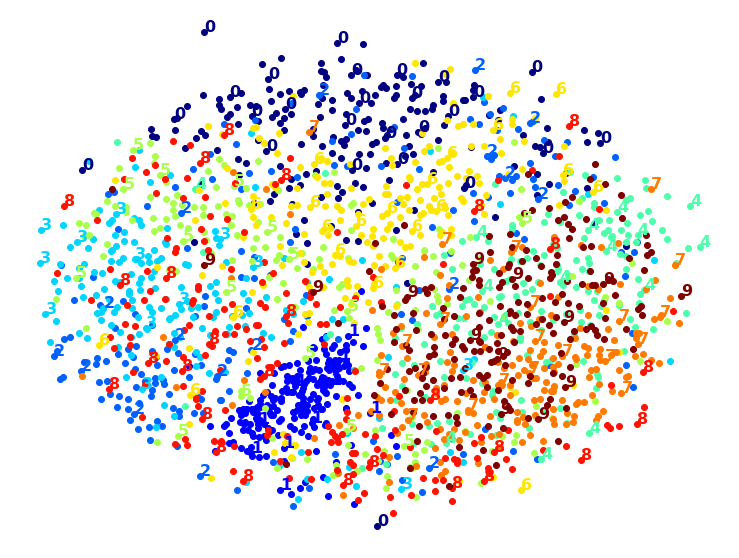

In [172]:
from sklearn.pipeline import Pipeline

pca_mds =Pipeline([
    ("pca",PCA(n_components=0.95, random_state=42)),
    ("mds",MDS(n_components=2, random_state=42))
])
t0=time.time()
X_pca_mds_reduced =pca_mds.fit_transform(X[:2000])
t1=time.time()
print("MDS+PCA 시간 {:.1f}s (2000개 샘플)".format(t1-t0))
plot_digits(X_pca_mds_reduced,y[:2000])
plt.show()

#### 같은 결과에 속도도 동일합니다. PCA가 도움이 되지 않네요.



#### 
6.LDA
LDA는 원래 분류알고리즘. 클래스 사이를 가장 잘 구분하는 축을 학습
이 축을 데이터가 투영되는 초평면을 정의하는데 사용
가능한 클래스를 멀리 떨어지게 하므로, svm과 같은 분류 알고리즘을 사용하기 전에 좋음

LDA시간 10.0s


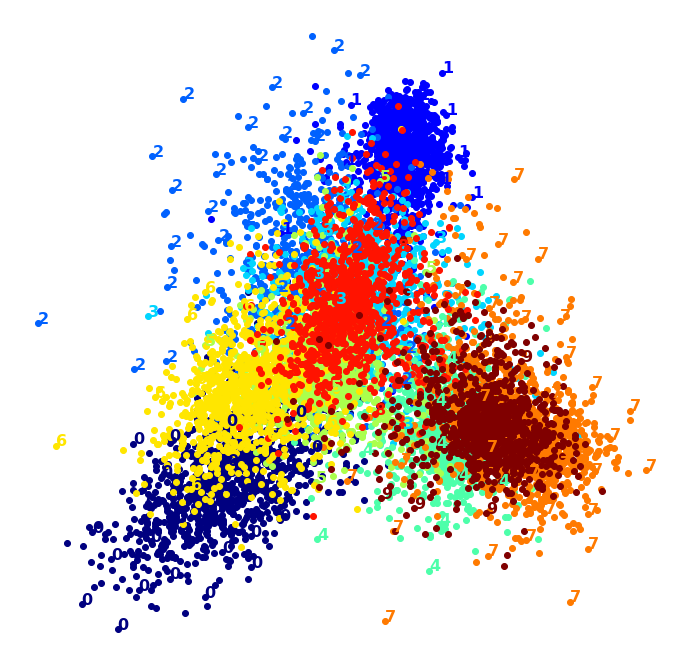

In [173]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0=time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,y)
t1 = time.time()

print("LDA시간 {:.1f}s".format(t1-t0))
plot_digits(X_lda_reduced, y , figsize=(12,12))
plt.show()

#### 매우 빨라 처음엔 괜찮아 보이지만 자세히 보면 몇 개의 군집이 심각하게 중복되어 있습니다.

t-SNE가 가장 좋음. 시간 측정

t-sne 시간 123.5s.


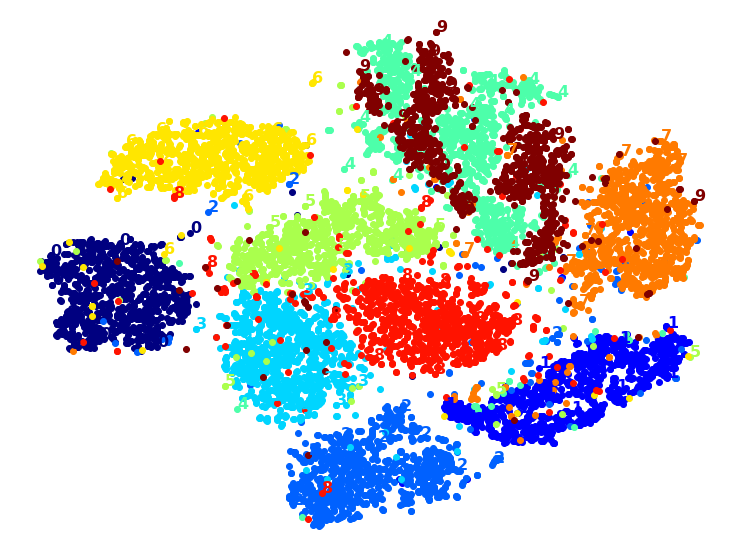

In [174]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2,random_state=42).fit_transform(X)
t1 = time.time()
print("t-sne 시간 {:.1f}s.".format(t1-t0))
plot_digits(X_tsne_reduced,y)
plt.show()


#### LLE 보다 두 배나 느립니다. 하지만 MDS 보단 훨씬 빠르고 결과물도 아주 좋습니다. PCA가 속도를 높여줄 수 있는지 확인해 보겠습니다:

#### pca + Tsne

PCA+t-SNE 시간 55.5s.


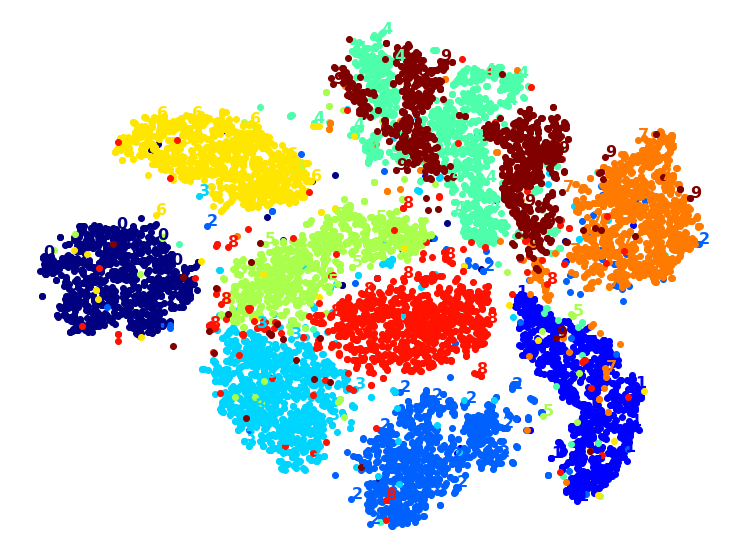

In [175]:
pca_tsne = Pipeline([
    ("pca",PCA(n_components=0.95, random_state=42)),
    ("tsne",TSNE(n_components=2,random_state=42))
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE 시간 {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()


# 네, 결과물에 영향을 미치지 않으면서 PCA 속도가 34% 정도 향상되었습니다. 이것이 제일 좋네요!